## Data Understanding

In [68]:
# install modelbit
%pip install modelbit
%pip install matplotlib
%pip install xgboost
%pip install openpyxl
%pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
import modelbit
mb = modelbit.login()

##### Column decsriptions


1. Contract Number: 66,549 unique values (slightly fewer than the total rows), with 72 missing entries.
2. Amount: 50,594 unique values, indicating a high variance in contract amounts, with 855 missing values.
3. Dates:
Various date columns have a broad range of unique values, suggesting contracts are spread over a significant timeline.
4. Sign Date, Start Date, End Date, etc., have varying numbers of unique values, hinting at different stages and lengths of contract processes.
5. Agpo Certificate Number: Only 13,606 unique values, with 57,311 missing entries, indicating that this information may not be recorded for every contract.
6. Awarded Agpo Group Id: Contains only 4 unique values (Women, Youth, All, People with Disabilities) but has a high number of missing values (58,261).
7. Terminated: Only one unique value, 1.0, across the 88 non-null entries, suggesting limited use of this column in identifying terminated contracts.
8. Financial Year: 15 unique values, representing different fiscal years.
9. Quarter: 4 unique values (Q1, Q2, Q3, Q4), with 3,495 missing entries.
10. PE Name: 498 unique values, indicating a range of entities participating in the contracts.
11. Supplier Name: 25,419 unique supplier names, suggesting substantial diversity in supplier entities.
12. No. of B.O.I: Contains only 19 unique values, with the majority of entries missing (67,866).
13. Created At: Timestamped information on record creation with 48,558 unique values and 34,028 missing values, hinting at possibly incomplete time-tracking data.

In [48]:
# IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

# SKLEARN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from xgboost import XGBClassifier
import warnings
# warnings.filterwarnings('ignore')




In [49]:
class DataUnderstanding():
    """Class that provides an understanding of a dataset"""

    def __init__(self, data=None):
        """Initialization"""
        self.df = data

    def load_data(self, path):
        """Load the data"""
        if self.df is None:

            self.df = pd.read_excel(path)
        return self.df

    def concat_data(self, other_df):
        """Concatenate the current dataframe with another dataframe vertically"""
        if self.df is not None and other_df is not None:
            self.df = pd.concat([self.df, other_df], axis=0, ignore_index=True)
        return self.df

    def understanding(self):
        """Provides insights into the dataset"""
        # Info
        print("INFO")
        print("-" * 4)
        self.df.info()

        # Shape
        print("\n\nSHAPE")
        print("-" * 5)
        print(f"Records in dataset: {self.df.shape[0]} with {self.df.shape[1]} columns.")

        # Columns
        print("\n\nCOLUMNS")
        print("-" * 6)
        print("Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")

        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-" * 12)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in {col} include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")

        # Missing or Null Values
        print("\nMISSING VALUES")
        print("-" * 15)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].isnull().sum()} missing values.")

        # Duplicate Values
        print("\n\nDUPLICATE VALUES")
        print("-" * 16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")

# Initialize data understanding
data = DataUnderstanding()

# Load the first dataset
data_path1 = "published_contracts.xlsx" # The path to your Excel file
df = data.load_data(data_path1)


df.head()

,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Agpo Certificate Number,Awarded Agpo Group Id,Created By,Terminated,Financial Year,Quarter,Tender Ref.,PE Name,Supplier Name,No. of B.O.I,Created At
0,0015.1,1962488.0,2018-09-26,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-09-26,2018-09-26,2018-09-26,2018-10-25,NaN,NaN,1,NaN,2018/2019,Q1,KEMSA/ONT 06/2017-2019,Higher Education Loan Board,VIABLE DECO SOLUTIONS LIMITED,NaN,2019-01-31 09:55:20
1,38632,257736.0,2018-10-02,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-10-04,2018-10-05,2018-10-08,2018-10-23,NaN,NaN,1,NaN,2018/2019,Q2,KEMSA/ONT 06/2017-2019,Kenya Post Office Saving Bank,COMPUTERWAYS LIMITED,NaN,2019-02-19 10:14:13
2,38631,254736.0,2018-09-25,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-19,2018-10-02,2018-10-05,2018-10-12,2018-11-12,NaN,NaN,1,NaN,2018/2019,Q1,KEMSA/ONT 06/2017-2019,Kenya Post Office Saving Bank,REALISTIC SYSTEMS AND TECHNOLOGIES,NaN,2019-02-27 14:28:26
3,0189,149300.0,2019-02-19,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-01-15,2019-02-07,2019-02-11,2019-02-11,2019-03-11,NaN,NaN,1,NaN,2018/2019,Q3,KEMSA/ONT 06/2017-2019,Embu,JIMRIVER CARGO LOGISTICS LIMITED,NaN,2019-03-15 10:03:54
4,LPO 1079.,81500.0,2018-12-27,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-12-27,2018-12-27,2018-12-27,2018-12-27,2019-01-26,NaN,NaN,1,NaN,2018/2019,Q2,KEMSA/ONT 06/2017-2019,Higher Education Loan Board,MATKY INVESTMENTS,NaN,2019-03-17 18:11:54


In [50]:
# Get an understanding of the dataset
data.understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81549 entries, 0 to 81548
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contract Number             81477 non-null  object 
 1   Amount                      80715 non-null  float64
 2   Award Date                  81549 non-null  object 
 3   Tender Title                81534 non-null  object 
 4   Eval Completion Date        81549 non-null  object 
 5   Notification Of Award Date  81549 non-null  object 
 6   Sign Date                   69038 non-null  object 
 7   Start Date                  80561 non-null  object 
 8   End Date                    80537 non-null  object 
 9   Agpo Certificate Number     25006 non-null  object 
 10  Awarded Agpo Group Id       24055 non-null  object 
 11  Created By                  81549 non-null  int64  
 12  Terminated                  87 non-null     float64
 13  Financial Year       

#### Summary Observations:
- Data Completeness: Several columns, especially those related to specific certifications and awards (e.g., Agpo Certificate Number and Awarded Agpo Group Id), have significant missing values, which may affect analyses focused on these categories.
- Data Quality: With 141 duplicates and varying levels of missing values, some data cleaning will be required, particularly for categorical columns that are missing a large portion of data.
- Potential Areas for Analysis: Despite missing values, substantial information is available regarding contract details (e.g., Amount, PE Name, Supplier Name), dates, and contract progression stages. These can support analyses related to contract timelines, supplier diversity, and financial tracking over different periods (fiscal years and quarters).

The dataset has 124 duplicate values


Here's an analysis of each column's relevance for fraud detection, ranked by importance:
High Relevance (Critical for Fraud Detection):

Temporal Columns (Pattern Analysis):


Award Date
Eval Completion Date
Notification Of Award Date
Sign Date
Start Date
End Date
→ These can reveal suspicious patterns like:

Backdating
Unrealistic timelines
Process sequence violations




Financial Information:


Amount
→ Critical for detecting:

Split purchases
Threshold avoidance
Unusual pricing patterns
Round numbers (often indicative of fraud)




Entity Information:


Supplier Name
PE Name (Procuring Entity)
→ Important for:

Shell company detection
Multiple awards to same supplier
Cross-referencing with known fraudulent entities



Medium Relevance:

Process Identifiers:


Contract Number
Tender Ref.
→ Useful for:

Detecting duplicate contracts
Sequential pattern analysis
Reference number manipulation




Classification Fields:


Financial Year
Quarter
→ Helpful for:

End-of-period fraud patterns
Budget exhaustion patterns
Seasonal anomalies




Compliance Indicators:


Agpo Certificate Number
Awarded Agpo Group Id
→ Can indicate:

Certificate fraud
Qualification manipulation



Lower Relevance (But Still Useful):

Metadata:


Created By
Created At
No. of B.O.I
→ Can reveal:

Unusual creation patterns
User behavior anomalies




Status Indicators:


Terminated
→ May indicate:

Contract execution issues
Post-award problems



For your ML model, I recommend focusing on these key feature engineering approaches:

Temporal Features:


Time differences between dates
Process duration
Date sequence violations
End of period patterns


Financial Features:


Amount distributions
Threshold proximity
Round number detection
Split payment patterns


Entity Features:


Supplier award frequency
Entity relationships
New supplier flags
Geographic patterns


Metadata Features:


Creation patterns
User behavior patterns
Documentation completeness

## Data Cleaning

In [51]:
class DataUnderstanding:
    def load_data(self, file_path):
        """Load data from an Excel file."""
        try:
            self.df = pd.read_excel(file_path)
            print(f"Data loaded successfully from {file_path}")
        except Exception as e:
            print(f"Error loading data: {e}")
            self.df = None

class DataCleaning(DataUnderstanding):
    """This class is used for data cleaning"""

    def drop_columns(self, columns):
        """Drop specified columns."""
        if self.df is not None:
            print(f"Dropping Columns: {columns}")
            self.df.drop(columns=columns, inplace=True)

    def strip_column_names(self):
        """Strip whitespace from column names."""
        if self.df is not None:
            print("Stripping whitespace from column names")
            self.df.columns = self.df.columns.str.strip()

    def convert_to_datetime(self, columns):
        """Convert specified columns to datetime format, handling errors with NaT."""
        if self.df is not None:
            for column in columns:
                print(f"Converting {column} to datetime format")
                self.df[column] = pd.to_datetime(self.df[column], errors='coerce')

    # def filter_year(self, column_name, year):
    #     """Filter rows based on a specific year in a date column."""
    #     if self.df is not None and column_name in self.df.columns:
    #         print(f"Filtering rows for the year {year} in column {column_name}")
    #         self.df = self.df[self.df[column_name].dt.year == year]

    # def remove_null_rows(self, columns=None):
    #     """Remove rows with null values, either in specified columns or all columns."""
    #     if self.df is not None:
    #         if columns:
    #             print(f"Removing rows with nulls in columns: {columns}")
    #             self.df.dropna(subset=columns, inplace=True)
    #         else:
    #             print("Removing rows with any null values")
    #             self.df.dropna(inplace=True)

    def num_duplicates(self):
        """Check and return the total number of duplicate rows."""
        if self.df is not None:
            duplicate_count = self.df.duplicated().sum()
            print(f"Number of duplicate rows: {duplicate_count}")
            return duplicate_count

    def drop_duplicates(self):
        """Drop duplicate rows from the DataFrame."""
        if self.df is not None:
            print("Dropping duplicate rows")
            self.df.drop_duplicates(inplace=True)


# Usage
data = DataCleaning()

# Load the dataset
data_path = 'published_contracts.xlsx'
data.load_data(data_path)

# Drop duplicates
data.drop_duplicates()

# Drop irrelevant columns
irrelevant_columns = ['Agpo Certificate Number', 'Awarded Agpo Group Id', 'Terminated', 'No. of B.O.I']
data.drop_columns(irrelevant_columns)

# Strip column names of any leading/trailing whitespace
data.strip_column_names()

# Convert specified columns to datetime format
date_columns = ['Award Date', 'Eval Completion Date', 'Sign Date', 'Created At']
data.convert_to_datetime(date_columns)

# Remove rows with null values in the date columns
# data.remove_null_rows(columns=date_columns)

# Store the final cleaned dataset in df
df = data.df

# Print the cleaned DataFrame
print(df.head())


Data loaded successfully from published_contracts.xlsx
Dropping duplicate rows
Dropping Columns: ['Agpo Certificate Number', 'Awarded Agpo Group Id', 'Terminated', 'No. of B.O.I']
Stripping whitespace from column names
Converting Award Date to datetime format
Converting Eval Completion Date to datetime format
Converting Sign Date to datetime format
Converting Created At to datetime format
  Contract Number     Amount Award Date  \
0          0015.1  1962488.0 2018-09-26   
1           38632   257736.0 2018-10-02   
2           38631   254736.0 2018-09-25   
3            0189   149300.0 2019-02-19   
4       LPO 1079.    81500.0 2018-12-27   

                                        Tender Title Eval Completion Date  \
0  Supply of Non Pharmaceuticals (Surgical Tubes,...           2018-09-25   
1  Supply of Non Pharmaceuticals (Surgical Tubes,...           2018-09-25   
2  Supply of Non Pharmaceuticals (Surgical Tubes,...           2018-09-19   
3  Supply of Non Pharmaceuticals (Surgica

#### Checkng for duplicate values


In [52]:
# Checking for duplicates incase they were not fully removed
df.duplicated().sum()

14

In [53]:
# Subset the duplicate values
df[df.duplicated]


,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Created By,Financial Year,Quarter,Tender Ref.,PE Name,Supplier Name,Created At
36525,GF ATM HIV NFM-2022/2023-OIT-06– FOR SUPPLY OF...,11040000.00,2022-10-07,SUPPLY OF ARVs MEDICINES – PAEDIATRICS,2022-09-09,2022-10-12,2022-12-13,2022-12-13,2023-12-12,11047,2022/2023,Q2,GF ATM HIV NFM-2022/2023 OIT-06,Kenya Medical Supplies Authority,AUROBINDO PHARMA LIMITED,NaT
39670,180,5241680.00,2023-03-16,1186727/2022/2023,2023-03-14,2023-03-31,2023-03-31,2023-03-31,2023-05-05,11962,2022/2023,Q3,SUPPLY OF TOOLS OF TRADE,Makueni,RELIABLE PACKERS LIMITED,NaT
42179,Conract,1166100.00,2023-03-13,CONSULTANCY FOR A FEASIBILITY STUDY TO INFORM ...,2023-03-13,2023-03-14,2023-03-22,2023-04-20,2023-05-05,13648,2022/2023,Q3,NETFUND/RFP/001/2022-2023,Netfund,SUSTAINABLE BUSINESS CONSULTING LIMITED,NaT
45202,CGS/PWRT/OT/22-23/08,2734780.93,2023-03-08,Routine Maintenance of Koyule Hono Road in Nor...,2023-02-24,2023-03-28,2023-04-04,2023-04-11,2023-07-30,12241,2022/2023,Q3,CGS/PWR/OT/2022-2023/08,Siaya,REAL LUC LOGISTICS LIMITED,NaT
47382,1027,1961400.00,2023-05-23,Provision of Consultancy Services for Youth Pr...,2023-05-08,2023-05-23,2023-05-29,2023-06-05,2023-07-31,14494,2022/2023,Q4,CGS/SCM/EDUCATION/ RFP/2022-2023/002,Siaya,PLUTUS CONSULTING LIMITED,NaT
49934,658,9207620.00,2023-03-27,PROPOSED CONSTRUCTION OF A MASONRY PERIMETER ...,2023-03-10,2023-03-27,2023-04-14,2023-04-14,2023-10-13,12209,2022/2023,Q3,CGN/YSGC&SS /ONT/004/2022-2023,Nakuru,NJONTURI COMPANY LIMITED,NaT
57597,003755,717500.00,2022-05-05,PROVISION OF RETURN AIRTICKET NAIROBI-TEL AVIV,2022-05-05,2022-05-05,2022-05-05,2022-05-05,2022-05-25,12627,2021/2022,Q4,WRA/HQ/GOK/DR/141/22-23,Water Resources Authority,LORDSTOWN TRAVEL GROUP LIMITED,2023-12-11 15:46:54
59478,NETFUND/RFP/002/2023-2024,20802280.00,2023-08-29,REQUEST FOR PROPOSAL FOR CONSULTANCY TO DEVELO...,2023-08-28,2023-08-30,2023-09-01,2023-09-04,2024-01-31,13648,2023/2024,Q1,NETFUND/RFP/002/2023-2024,Netfund,JMD ADVOCATES,2024-01-16 14:45:22
59953,1387616,3925742.60,2023-10-24,TENDER FOR THE INSTALLATION OF CULVERT LINES I...,2023-10-19,2023-10-25,2023-10-25,2023-10-25,2024-01-22,12926,2023/2024,Q2,1356992-2023/2024,Kirinyaga,WAGATHITU STRATEGIES,2024-01-25 10:46:43
60866,003,9239410.00,2023-04-26,PROPOSED RE-ROOFING AND REPAIR WORKS OF OLD TO...,2023-04-13,2023-04-26,2023-05-12,2023-05-17,2023-09-15,12209,2022/2023,Q4,CGN/NKRCB/ONT/003/2022-2023,Nakuru,SOFT PROVIDER COMPANY LIMITED,2024-02-08 12:38:07


In [54]:
# Checking for duplicates based on a subset of columns
duplicates = df[df.duplicated(subset=['Contract Number'], keep=False)]
duplicates


,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Created By,Financial Year,Quarter,Tender Ref.,PE Name,Supplier Name,Created At
3,0189,149300.0,2019-02-19,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-01-15,2019-02-07,2019-02-11,2019-02-11,2019-03-11,1,2018/2019,Q3,KEMSA/ONT 06/2017-2019,Embu,JIMRIVER CARGO LOGISTICS LIMITED,2019-03-15 10:03:54
7,00100,4084650.0,2019-03-12,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-03-11,2019-03-12,2019-03-18,2019-03-18,2019-04-29,1,2018/2019,Q3,KEMSA/ONT 06/2017-2019,ICDC,KPMG ADVISORY SERVICES LIMITED,2019-03-18 10:31:41
41,0002,1576.0,2018-10-11,SUPPLY AND DELIVERY OF MINERAL WATER,2018-09-14,2018-10-12,2018-11-09,2018-11-09,2020-06-30,1,2018/2019,Q2,TNTP/SDP/T/002/2018-2020,State Department of Planning,EMMAFEST INVESTMENT,2018-11-14 21:52:25
86,8850,278000.0,2018-07-11,Supply & Delivery of Office Chairs,2018-07-06,2018-07-16,2018-07-16,2018-07-11,2018-07-30,1,2018/2019,Q1,RBA/RFQ/OFFICECHAIRS/613/726/2018,Retirement Benefits Authority,Pema General Suppliers,2018-08-14 18:51:51
99,0000,5556000.0,2018-09-03,PROVISION OF SECURITY GUARDING SERVICES,2018-08-27,2018-09-09,2018-10-01,2018-10-01,2020-06-30,1,2018/2019,Q1,HELB/T/1/2018-2019,Higher Education Loan Board,KLEEN HOMES SECURITY SERVICES LIMITED,2018-10-31 10:59:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81519,396,169250.0,2024-09-13,General Office Supplies,2024-09-13,2024-09-13,2024-09-13,2024-09-13,2024-10-16,11366,2024/2025,Q1,KYEB/18/2024/25,Kenya Yearbook Editorial Board,DENKIM ENTERPRISES,2024-10-11 13:08:49
81531,445,81000.0,2024-08-30,OFFICE CLEANING,2024-08-30,2024-09-30,2024-08-30,2024-08-30,2025-08-31,11366,2024/2025,Q1,KYEB/19/2024-25,Kenya Yearbook Editorial Board,CHEBUMAC SOLUTION LIMITED,2024-10-11 14:45:12
81544,391,1020000.0,2024-08-07,LAPTOPS,2024-08-07,2024-08-07,2024-08-07,2024-08-07,2024-08-13,11366,2024/2025,Q1,KYEB/20/2024-25,Kenya Yearbook Editorial Board,POWERNET KENYA LIMITED,2024-10-11 18:24:21
81545,01160,562500.0,2024-03-15,SUPPLY AND DELIVERY OF PRINTED PROMOTIONAL MAT...,2024-03-13,2024-03-15,2024-03-15,2024-09-25,2024-09-25,13024,2023/2024,Q3,RU/REG/A31/184/22-24,Rongo University,SP GRAPHICS LIMITED,2024-10-12 11:49:56


Having subsetted the duplicates by contract number it show that the dataset has no duplicate values

#### Checking for nulll values in teh dataset

In [55]:
df.isna().sum()

Contract Number                  72
Amount                          834
Award Date                        5
Tender Title                     15
Eval Completion Date             32
Notification Of Award Date        0
Sign Date                     12502
Start Date                      988
End Date                       1012
Created By                        0
Financial Year                    0
Quarter                        3483
Tender Ref.                      15
PE Name                           0
Supplier Name                     0
Created At                    33858
dtype: int64

In [56]:

# Ensure the relevant columns are in datetime format
df['Award Date'] = pd.to_datetime(df['Award Date'], errors='coerce')
df['Sign Date'] = pd.to_datetime(df['Sign Date'], errors='coerce')

# Calculate Start Date by subtracting Award Date from Sign Date
df['Start Date'] = df['Sign Date'] - df['Award Date']

# Convert Start Date to the desired format (YYYY-MM-DD)
df['Formatted Start Date'] = (df['Award Date'] + df['Start Date']).dt.strftime('%Y-%m-%d')

# Print the DataFrame to see the changes
print(df[['Award Date', 'Sign Date', 'Formatted Start Date']].head())



  Award Date  Sign Date Formatted Start Date
0 2018-09-26 2018-09-26           2018-09-26
1 2018-10-02 2018-10-05           2018-10-05
2 2018-09-25 2018-10-05           2018-10-05
3 2019-02-19 2019-02-11           2019-02-11
4 2018-12-27 2018-12-27           2018-12-27


In [57]:
df.columns

Index(['Contract Number', 'Amount', 'Award Date', 'Tender Title',
       'Eval Completion Date', 'Notification Of Award Date', 'Sign Date',
       'Start Date', 'End Date', 'Created By', 'Financial Year', 'Quarter',
       'Tender Ref.', 'PE Name', 'Supplier Name', 'Created At',
       'Formatted Start Date'],
      dtype='object')


Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14135
           1       1.00      1.00      1.00      2175

    accuracy                           1.00     16310
   macro avg       1.00      1.00      1.00     16310
weighted avg       1.00      1.00      1.00     16310



/tmp/ipykernel_8162/1029088748.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['risk_score'] = risk_score[analysis.index]


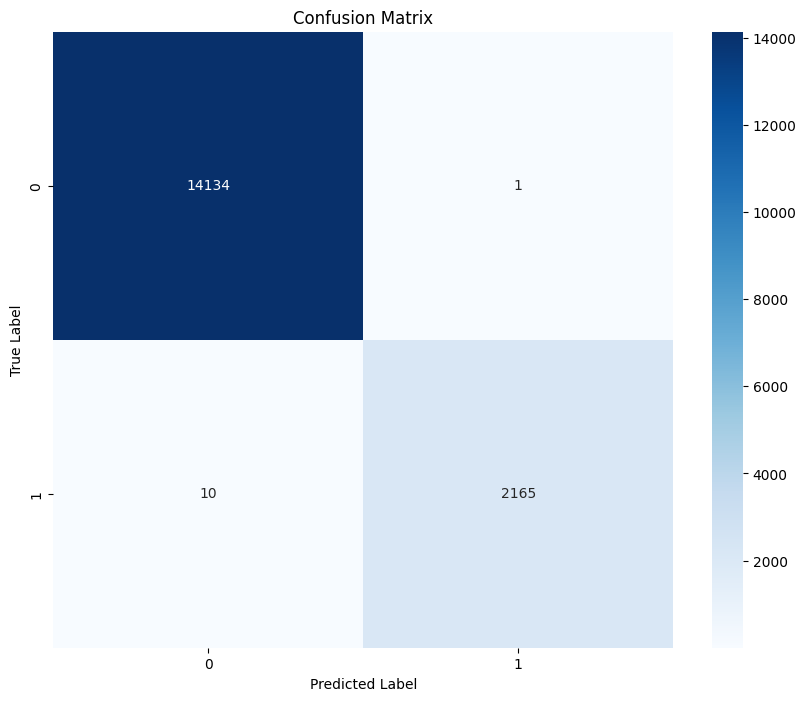

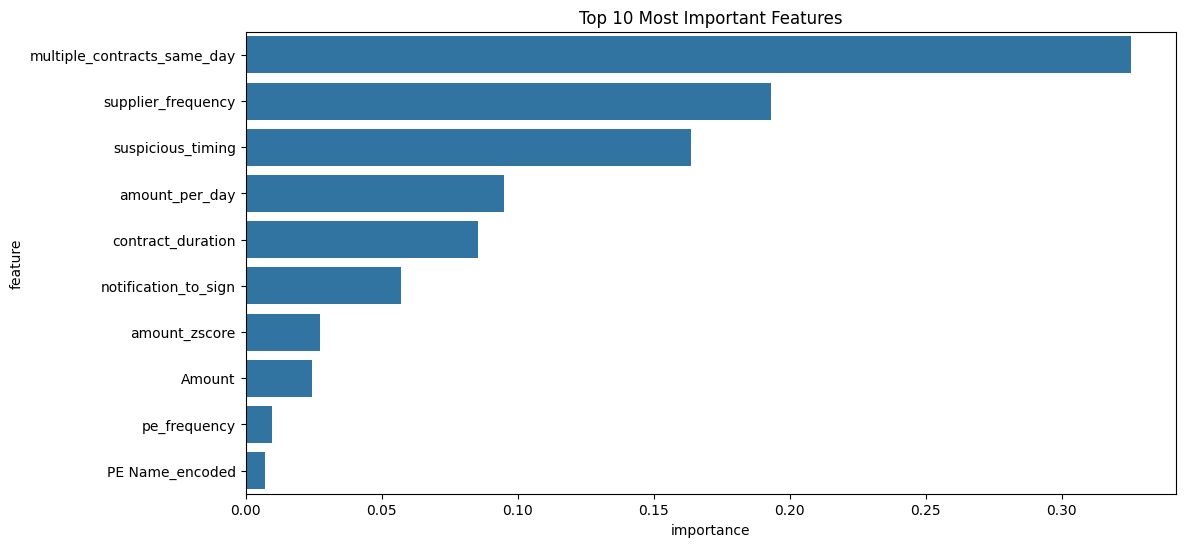

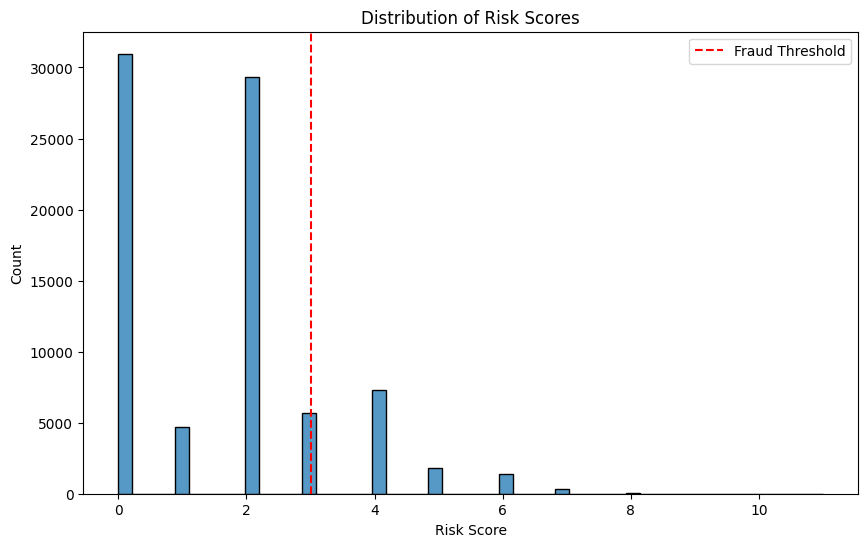


Top 10 Most Suspicious Cases:
                                         Contract Number        Amount  \
20520   GF ATM HIV NFM - 20/21 – OIT - 001 Supply of ...  2.171478e+09   
30745                          ---KeNHA/D&C/RD/2308/2017  5.079518e+09   
78254                                                509  1.219500e+06   
19118                                               1460  2.875000e+06   
20189                                    LSO NO: 1901744  1.092340e+06   
20152     LPO NO'S: 2917220, 2917221, 2917222, & 2917223  9.127550e+05   
49291                                       LPO NO 53959  4.300000e+05   
20590                                                719  1.947223e+06   
20674                       GF ATM HIV NFM-20/21-OIT-001  2.137651e+09   
10357                    NCIA/CONT/PCFRS/001/2019 - 2020  5.851000e+06   

      Award Date                                      Supplier Name  \
20520 2020-11-09         CONTRALINKS SOLUTIONS AND SERVICES LIMITED   
30745 2017-0

In [58]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
class ProcurementFraudDetector:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_columns = None

    def preprocess_data(self, df):
        """Create features that might indicate fraudulent behavior"""

        # Convert date columns to datetime
        date_columns = [
            'Award Date', 'Eval Completion Date', 'Notification Of Award Date',
            'Sign Date', 'Start Date', 'End Date', 'Created At'
        ]

        for col in date_columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

        # 1. Time-based features (using existing processing_time)
        df['notification_to_sign'] = (df['Sign Date'] - df['Notification Of Award Date']).dt.days
        df['contract_duration'] = (df['End Date'] - df['Start Date']).dt.days

        # 2. Amount-based features
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
        df['amount_per_day'] = df['Amount'] / df['contract_duration'].replace(0, np.nan)

        # 3. Create suspicious indicators
        df['suspicious_timing'] = (
            # (df['processing_time'] < 1) |  # Unusually fast processing
            (df['notification_to_sign'] < 1) |  # Immediate signing
            (df['contract_duration'] < 7)  # Very short contracts
        ).astype(int)

        # 4. Supplier frequency analysis
        supplier_counts = df['Supplier Name'].value_counts()
        df['supplier_frequency'] = df['Supplier Name'].map(supplier_counts)

        # 5. Amount anomaly detection
        df['amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
        df['high_amount_anomaly'] = (df['amount_zscore'] > 2).astype(int)

        # 6. Weekend/Holiday processing
        df['is_weekend_award'] = df['Award Date'].dt.dayofweek.isin([5, 6]).astype(int)

        # 7. End of financial year rush
        df['month_of_fy'] = df['Award Date'].dt.month
        df['is_fy_end'] = (df['month_of_fy'].isin([6, 7])).astype(int)  # June/July

        # 8. PE (Procuring Entity) frequency analysis
        pe_counts = df['PE Name'].value_counts()
        df['pe_frequency'] = df['PE Name'].map(pe_counts)

        # 9. Multiple contracts to same supplier
        supplier_date_counts = df.groupby(['Supplier Name', 'Award Date']).size().reset_index(name='daily_contracts')
        df = df.merge(supplier_date_counts, on=['Supplier Name', 'Award Date'], how='left')
        df['multiple_contracts_same_day'] = (df['daily_contracts'] > 1).astype(int)

        return df

    def create_fraud_labels(self, df):
        """Create fraud labels based on multiple risk factors"""

        # Initialize risk score
        risk_score = pd.Series(0, index=df.index)

        # Add risk factors with weights
        risk_factors = {
            'suspicious_timing': 2,
            'high_amount_anomaly': 3,
            'is_weekend_award': 1,
            'is_fy_end': 1,
            'multiple_contracts_same_day': 2
        }

        for factor, weight in risk_factors.items():
            risk_score += df[factor] * weight

        # Additional risk for frequent suppliers with high amounts
        risk_score += (df['supplier_frequency'] > df['supplier_frequency'].quantile(0.95)).astype(int) * 2

        # Additional risk for high amount per day
        amount_per_day_threshold = df['amount_per_day'].quantile(0.95)
        risk_score += (df['amount_per_day'] > amount_per_day_threshold).astype(int) * 2

        # Label as potentially fraudulent if risk score exceeds threshold
        fraud_threshold = risk_score.quantile(0.85)  # Top 15% as suspicious
        df['fraud_label'] = (risk_score > fraud_threshold).astype(int)

        return df, risk_score

    def prepare_features(self, df):
        """Prepare features for machine learning"""

        feature_columns = [
            'Amount','notification_to_sign', 'contract_duration',
            'amount_per_day', 'supplier_frequency', 'amount_zscore', 'pe_frequency',
            'suspicious_timing', 'high_amount_anomaly', 'is_weekend_award',
            'is_fy_end', 'multiple_contracts_same_day'
        ]

        categorical_columns = ['Quarter', 'PE Name']

        # Encode categorical variables
        for col in categorical_columns:
            if col not in self.label_encoders:
                self.label_encoders[col] = LabelEncoder()
            df[f'{col}_encoded'] = self.label_encoders[col].fit_transform(df[col].astype(str))
            feature_columns.append(f'{col}_encoded')

        self.feature_columns = feature_columns
        X = df[feature_columns]
        y = df['fraud_label']

        # Handle missing values
        X = X.fillna(X.mean())

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        return X_scaled, y

    def train_model(self, X, y):
        """Train the fraud detection model"""

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Initialize and train the model
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=10,
            class_weight='balanced',
            random_state=42
        )

        self.model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = self.model.predict(X_test)
        print("\nModel Evaluation:")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        return X_test, y_test, y_pred

    def analyze_suspicious_cases(self, df, risk_score):
        """Analyze and return details of suspicious cases"""

        high_risk_threshold = risk_score.quantile(0.95)  # Top 5% most suspicious cases
        suspicious_cases = df[risk_score > high_risk_threshold].copy()

        analysis = suspicious_cases[[
            'Contract Number', 'Amount', 'Award Date', 'Supplier Name', 'PE Name', 'notification_to_sign', 'contract_duration',
            'amount_per_day', 'suspicious_timing', 'high_amount_anomaly'
        ]]

        analysis['risk_score'] = risk_score[analysis.index]
        analysis = analysis.sort_values('risk_score', ascending=False)

        return analysis

    def visualize_results(self, X_test, y_test, y_pred, df, risk_score):
        """Create visualizations for model evaluation"""

        # 1. Confusion Matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # 2. Feature Importance
        feature_importance = pd.DataFrame({
            'feature': self.feature_columns,
            'importance': self.model.feature_importances_
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
        plt.title('Top 10 Most Important Features')
        plt.show()

        # 3. Risk Score Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(data=risk_score, bins=50)
        plt.axvline(x=risk_score.quantile(0.85), color='r', linestyle='--', label='Fraud Threshold')
        plt.title('Distribution of Risk Scores')
        plt.xlabel('Risk Score')
        plt.ylabel('Count')
        plt.legend()
        plt.show()

# Usage example:
def run_fraud_detection(data_path):
    # Read the data
    df = pd.read_excel(data_path)

    # Initialize the detector
    detector = ProcurementFraudDetector()

    # Process the data
    df_processed = detector.preprocess_data(df)
    df_labeled, risk_score = detector.create_fraud_labels(df_processed)

    # Prepare features and train the model
    X, y = detector.prepare_features(df_labeled)
    X_test, y_test, y_pred = detector.train_model(X, y)

    # Analyze suspicious cases
    suspicious_cases = detector.analyze_suspicious_cases(df_labeled, risk_score)

    # Visualize results
    detector.visualize_results(X_test, y_test, y_pred, df_labeled, risk_score)

    return df_labeled, suspicious_cases, detector.model

if __name__ == "__main__":
    # Run the fraud detection
    df_labeled, suspicious_cases, model = run_fraud_detection('published_contracts.xlsx')

    # Print suspicious cases
    print("\nTop 10 Most Suspicious Cases:")
    print(suspicious_cases.head(10))

In [59]:
suspicious_cases.columns

Index(['Contract Number', 'Amount', 'Award Date', 'Supplier Name', 'PE Name',
       'notification_to_sign', 'contract_duration', 'amount_per_day',
       'suspicious_timing', 'high_amount_anomaly', 'risk_score'],
      dtype='object')

In [60]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81549 entries, 0 to 81548
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Contract Number              81477 non-null  object        
 1   Amount                       80715 non-null  float64       
 2   Award Date                   81544 non-null  datetime64[ns]
 3   Tender Title                 81534 non-null  object        
 4   Eval Completion Date         81517 non-null  datetime64[ns]
 5   Notification Of Award Date   81544 non-null  datetime64[ns]
 6   Sign Date                    69033 non-null  datetime64[ns]
 7   Start Date                   80553 non-null  datetime64[ns]
 8   End Date                     80537 non-null  datetime64[ns]
 9   Agpo Certificate Number      25006 non-null  object        
 10  Awarded Agpo Group Id        24055 non-null  object        
 11  Created By                   81549 non-nu

In [61]:
df_labeled["fraud_label"].value_counts()

fraud_label
0    70672
1    10877
Name: count, dtype: int64

In [62]:
df_labeled.head()

,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Agpo Certificate Number,...,high_amount_anomaly,is_weekend_award,month_of_fy,is_fy_end,pe_frequency,daily_contracts,multiple_contracts_same_day,fraud_label,Quarter_encoded,PE Name_encoded
0,0015.1,1962488.0,2018-09-26,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-09-26,2018-09-26,2018-09-26,2018-10-25,NaN,...,0,0,9.0,0,509,1.0,0,0,0,115
1,38632,257736.0,2018-10-02,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-10-04,2018-10-05,2018-10-08,2018-10-23,NaN,...,0,0,10.0,0,58,2.0,1,0,1,207
2,38631,254736.0,2018-09-25,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-19,2018-10-02,2018-10-05,2018-10-12,2018-11-12,NaN,...,0,0,9.0,0,58,1.0,0,0,0,207
3,0189,149300.0,2019-02-19,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-01-15,2019-02-07,2019-02-11,2019-02-11,2019-03-11,NaN,...,0,0,2.0,0,194,1.0,0,0,2,100
4,LPO 1079.,81500.0,2018-12-27,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-12-27,2018-12-27,2018-12-27,2018-12-27,2019-01-26,NaN,...,0,0,12.0,0,509,1.0,0,0,1,115


In [63]:
# Load and preprocess the data
def prepare_data(df):
    # Drop non-numeric columns and handle missing values
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols].copy()

    # Fill missing values with median
    df_numeric = df_numeric.fillna(df_numeric.median())

    # Split features and target
    X = df_numeric.drop('fraud_label', axis=1)
    y = df_numeric['fraud_label']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM': SVC(probability=True, random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        results[name] = {
            'Classification Report': classification_report(y_test, y_pred),
            'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        results[name]['Cross Validation Score'] = {
            'Mean': cv_scores.mean(),
            'Std': cv_scores.std()
        }

    return results, models

def main():
    # Load your data


    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_labeled)

    # Train and evaluate models
    results, models = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print results
    for name, metrics in results.items():
        print(f"\n=== {name} Results ===")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nROC AUC Score:", metrics['ROC AUC Score'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("\nCross Validation ROC AUC Score:")
        print(f"Mean: {metrics['Cross Validation Score']['Mean']:.3f} (+/- {metrics['Cross Validation Score']['Std'] * 2:.3f})")

    # Find best performing model
    best_model = max(results.items(), key=lambda x: x[1]['ROC AUC Score'])
    print(f"\nBest performing model: {best_model[0]} with ROC AUC Score: {best_model[1]['ROC AUC Score']:.3f}")

    return results, models

if __name__ == "__main__":
    results, models = main()


Training Random Forest...

Training XGBoost...

Training Gradient Boosting...

Training Logistic Regression...

Training SVM...

=== Random Forest Results ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14135
           1       1.00      1.00      1.00      2175

    accuracy                           1.00     16310
   macro avg       1.00      1.00      1.00     16310
weighted avg       1.00      1.00      1.00     16310


ROC AUC Score: 0.9999994958304363

Confusion Matrix:
[[14134     1]
 [    6  2169]]

Cross Validation ROC AUC Score:
Mean: 1.000 (+/- 0.000)

=== XGBoost Results ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14135
           1       1.00      0.99      1.00      2175

    accuracy                           1.00     16310
   macro avg       1.00      1.00      1.00     16310
weighted avg       1.00   

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')

def prepare_data(df):
    # Drop non-numeric columns and handle missing values
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols].copy()

    # Fill missing values with median
    df_numeric = df_numeric.fillna(df_numeric.median())

    # Split features and target
    X = df_numeric.drop('fraud_label', axis=1)
    y = df_numeric['fraud_label']

    # Print class distribution before balancing
    print("\nClass distribution before balancing:")
    print(y.value_counts(normalize=True))

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create resampling pipeline
    oversample = SMOTE(sampling_strategy=0.5, random_state=42)  # Increase minority class
    undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Slightly reduce majority class
    steps = [('o', oversample), ('u', undersample)]
    pipeline = Pipeline(steps=steps)

    # Apply resampling
    X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_scaled, y_train)

    # Print class distribution after balancing
    print("\nClass distribution after balancing:")
    print(pd.Series(y_train_resampled).value_counts(normalize=True))

    return X_train_resampled, X_test_scaled, y_train_resampled, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models with class weight consideration
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        'XGBoost': XGBClassifier(scale_pos_weight=sum(y_train == 0) / sum(y_train == 1), random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
        'SVM': SVC(class_weight='balanced', probability=True, random_state=42)
    }

    results = {}
    best_model = None
    best_score = 0

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate detailed metrics
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

        results[name] = {
            'Classification Report': classification_report(y_test, y_pred),
            'Accuracy': accuracy,
            'Recall': recall,
            'ROC AUC Score': roc_auc,
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        results[name]['Cross Validation Score'] = {
            'Mean': cv_scores.mean(),
            'Std': cv_scores.std()
        }

        # Update best model if current model performs better
        if roc_auc > best_score:
            best_score = roc_auc
            best_model = (name, model)

    return results, models, best_model

def save_best_model(model_tuple, scaler=None):
    """Save the best performing model and scaler to disk"""
    name, model = model_tuple
    filename = f'best_model_{name.lower().replace(" ", "_")}.pkl'

    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    if scaler:
        with open('scaler.pkl', 'wb') as file:
            pickle.dump(scaler, file)

    print(f"\nBest model ({name}) saved as: {filename}")

def main():


    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_labeled)

    # Train and evaluate models
    results, models, best_model = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print detailed results
    for name, metrics in results.items():
        print(f"\n=== {name} Results ===")
        print(f"\nOverall Accuracy: {metrics['Accuracy']:.3f}")
        print(f"Recall Score: {metrics['Recall']:.3f}")
        print(f"ROC AUC Score: {metrics['ROC AUC Score']:.3f}")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("\nCross Validation ROC AUC Score:")
        print(f"Mean: {metrics['Cross Validation Score']['Mean']:.3f} (+/- {metrics['Cross Validation Score']['Std'] * 2:.3f})")

    # Save best model
    save_best_model(best_model)

    print(f"\nBest performing model: {best_model[0]}")
    print(f"Best model metrics:")
    print(f"Accuracy: {results[best_model[0]]['Accuracy']:.3f}")
    print(f"Recall: {results[best_model[0]]['Recall']:.3f}")
    print(f"ROC AUC: {results[best_model[0]]['ROC AUC Score']:.3f}")

    return results, models, best_model

if __name__ == "__main__":
    results, models, best_model = main()


Class distribution before balancing:
fraud_label
0    0.86662
1    0.13338
Name: proportion, dtype: float64

Class distribution after balancing:
fraud_label
0    0.555556
1    0.444444
Name: proportion, dtype: float64

Training Random Forest...

Training XGBoost...

Training Gradient Boosting...

Training Logistic Regression...

Training SVM...

=== Random Forest Results ===

Overall Accuracy: 1.000
Recall Score: 0.998
ROC AUC Score: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14135
           1       1.00      1.00      1.00      2175

    accuracy                           1.00     16310
   macro avg       1.00      1.00      1.00     16310
weighted avg       1.00      1.00      1.00     16310


Confusion Matrix:
[[14134     1]
 [    4  2171]]

Cross Validation ROC AUC Score:
Mean: 1.000 (+/- 0.000)

=== XGBoost Results ===

Overall Accuracy: 0.999
Recall Score: 0.995
ROC AUC Score: 1.000

Class

In [75]:
deploy_settings = {
    "env":"production",  # or "staging", "development"
    "model_name":"best_model",
    "model_description":"Anomaly Detection Model",
}

In [86]:
deployment = mb.create_deployment("best_model_random_forest.pkl")


ModelbitError: Failed to deploy.

In [ ]:
deployment = mb.get_deployment(deploy_settings.model_name)
print(deployment.status)

In [ ]:
predictions = mb.predict(deployment, input_data)